# Proyek Analisis Data: Kualitas Udara Daerah Dongsi
- Nama: Luthfi Anis Syafar
- Email: luthfianisyafar40@gmail.con
- ID Dicoding: mc200d5y0504

# Pertanyaan Bisnis
1. Bagaimana perubahan tingkat kualitas udara di daerash Stasiun Dongsi selama tahun 2013 hingga 2017?
2. Bagaimana pengaruh arah datangnya angin terhadap kualitas udara?

# Packages & Library

In [1]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dara Wrangling

## Gathering Data

In [5]:
airQlty_ds = pd.read_csv("data/PRSA_Data_Dongsi_20130301-20170228.csv")
print(airQlty_ds)

          No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  \
0          1  2013      3    1     0    9.0   9.0   3.0  17.0   300.0  89.0   
1          2  2013      3    1     1    4.0   4.0   3.0  16.0   300.0  88.0   
2          3  2013      3    1     2    7.0   7.0   NaN  17.0   300.0  60.0   
3          4  2013      3    1     3    3.0   3.0   5.0  18.0     NaN   NaN   
4          5  2013      3    1     4    3.0   3.0   7.0   NaN   200.0  84.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...     ...   ...   
35059  35060  2017      2   28    19   16.0  51.0   3.0  29.0   400.0  73.0   
35060  35061  2017      2   28    20   18.0  45.0   3.0  43.0   500.0  54.0   
35061  35062  2017      2   28    21   23.0  58.0   5.0  61.0   700.0  28.0   
35062  35063  2017      2   28    22   23.0  53.0   9.0  75.0   900.0  15.0   
35063  35064  2017      2   28    23   30.0  71.0  11.0  87.0  1200.0   4.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station 

Dataset berisi kualitas udara pada Stasiun Dongsi yang direkam dalam setiap jam mulai dari tanggal 1 maret 2013 hingga 28 Februari 2017.
Kualitas udara diidentifikasi dari berdasarkan beberapa parameter polutan berikut:
- PM2.5 - Partikel Udara 2.5
- PM10 - Partikel Udara 10
- SO2 - Sulfur Dioksida 
- NO2 - Nitrogen Dioksida
- CO - Karbon Monoksida
- O3 - Ozon

Selain itu juga ada beberapam parameter pendukung terkait kondisi udara stasiun beberapa parameter berikut:
- TEMP - Suhu
- PRES - Tekanan
- DEWP - Titik Embun
- RAIN - Curah Hujan
- WD - Arah Anign
- WSPM -Kecepatan Angin

## Assessing Data

### Informasi struktur dan informasi dataset

In [8]:
airQlty_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**Insight**
- Tidak ada keselahan tipe dat
- Beberapa kolom jumlah datanya tidak mencapai jumlah seluruh baris, berarti terdapat beberpa missing value

### Pengecekan datan kosong (null) dalam dataset

In [12]:
jumlah_baris_kosong = airQlty_ds.isnull().any(axis=1).sum()
print(f"Jumlah baris dengan data kosong: {jumlah_baris_kosong}")

jumlah_baris_kosong_per_tahun = airQlty_ds[airQlty_ds.isnull().any(axis=1)].groupby('year').size()
print(jumlah_baris_kosong_per_tahun)

airQlty_ds.isnull().sum()

Jumlah baris dengan data kosong: 4726
year
2013    2770
2014    1148
2015     209
2016     512
2017      87
dtype: int64


No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

**Insight**
- Kolom polutan terdapat data kosong mulai dari 900 hingga 1800 baris
- Kolom kondisi udara memiliki data kosong namun tidak sebanyak kolom polutan

### Pengecekan duplikat dalam dataset

In [16]:
# airQlty_ds = pd.read_csv("AirQualityDataset/PRSA_Data_Dongsi_20130301-20170228.csv")
print("Jumlah data duplikat:", airQlty_ds.duplicated().sum())

duplikat_waktu = airQlty_ds.duplicated(subset=['year', 'month', 'day', 'hour', 'station'])
print("Jumlah duplikat berdasarkan waktu:", duplikat_waktu.sum())

Jumlah data duplikat: 0
Jumlah duplikat berdasarkan waktu: 0


**Insight**
- Tidak ada data duplikat

### Pengecekan Persebaran Dataset

In [22]:
# airQlty_ds = pd.read_csv("AirQualityDataset/PRSA_Data_Dongsi_20130301-20170228.csv")
airQlty_ds.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


**Insight**

Keanehan di nilai maksimum
- PM2,5 dan PM10 memiliki  nilai maksimum yang melebihi dari kategori berbahaya
- CO dan O3 memiliki nilai max yang terlalu ekstrim
- Kolom PM2.5, PM10, SO2, NO2, CO, O3, dan WSPM perlu dilakukan pengecekan Outlier karena nilai Q3 dan nilai max memiliki perbedaan yang sangat jauh

**Note**
Wilayah Stasiun Dongsi berada di kota Beijing China, rentang waktu pada dataset merupakan waktu dengan catatan kualitas udara terburuk pada di kota tersebut. Meskipun memiliki catatan kualitas udara yang buruk pada waktu tersebut, wilayah Stasiun Dongsi seharusnya tidak memiliki faktor/variabel yang membuat kualitas udara menjadi ekstrim. Karakteristik wilayah Stasiin Dongsi:
- didominasi oleh hutong (gang-gang tradisional khas Beijing)
- merupakan kawasan pusat kota dengan lebih banyak bangunan bersejarah dan perumahan tradisional.
- Industri di daerah ini lebih mengarah ke sektor jasa, perdagangan kecil, dan wisata, bukan industri manufaktur berat. Tidak banyak pabrik indrusri besar.
- Jalanan di sekitar Stasiun Dongsi cukup sibuk, terutama karena lokasinya yang dekat dengan pusat kota Beijing.

### Pengecekan Outlier

In [24]:
columns_to_check = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'RAIN', 'WSPM'] # Daftar kolom yang dilakukan pengecekan

outlier_info = {} # dictionary untuk menyimpan hasil outlier

for col in columns_to_check:
    Q1 = airQlty_ds[col].quantile(0.25)
    Q3 = airQlty_ds[col].quantile(0.75)
    IQR = Q3 - Q1 

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    num_outliers = ((airQlty_ds[col] < lower_bound) | (airQlty_ds[col] > upper_bound)).sum()

    # Menyimpan informasi outlier
    outlier_info[col] = {
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outlier Count": num_outliers
    }

outlier_df = pd.DataFrame(outlier_info).T
print(outlier_df)

          Q1      Q3     IQR  Lower Bound  Upper Bound  Outlier Count
PM2.5   22.0   119.0    97.0       -123.5        264.5         1622.0
PM10    38.0   151.0   113.0       -131.5        320.5         1335.0
SO2      4.0    24.0    20.0        -26.0         54.0         2606.0
NO2     27.0    73.0    46.0        -42.0        142.0          600.0
CO     600.0  1700.0  1100.0      -1050.0       3350.0         1976.0
O3      12.0    81.0    69.0        -91.5        184.5         1318.0
RAIN     0.0     0.0     0.0          0.0          0.0         1371.0
WSPM     1.0     2.4     1.4         -1.1          4.5         1609.0


**Insight**
- Pengecekan outlier dilakukan pada kolom PM2.5, PM10, SO2, NO2, CO, O3, RAIN dan WSPM
- Batas bawah pasa setiap kolom bernilai negatif, sedangkan data pada kolom tersebut tidak ada negatif. Dapat diartikan tidak ada data outlier yang dibawah batas bawah
- Untuk kolom rain akan diabaikan


## Cleaning Data

### Mengatasi Missing Value

In [28]:
df_cleaning = pd.read_csv("data/PRSA_Data_Dongsi_20130301-20170228.csv") # variabel untuk cleaning dataset

# Teknik interpolasi untuk mengisi bagian missing value pada data kontinu
cols_to_interpolate = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
df_cleaning[cols_to_interpolate] = df_cleaning[cols_to_interpolate].interpolate(method='linear')

# Teknik interpolasi untuk mengisi bagian missing value pada wd (wind direction)
df_cleaning.fillna({'wd': df_cleaning['wd'].ffill()}, inplace=True)

df_cleaning.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.144243,110.347617,18.506142,53.953078,1331.913045,57.700357,13.668250,1012.551871,2.445126,0.063983,1.860815
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.260246,98.239918,22.954756,34.213245,1169.035307,58.327178,11.459735,10.266471,13.811939,0.786059,1.280427
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,38.000000,3.712800,27.000000,600.000000,13.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,150.000000,24.000000,74.000000,1700.000000,82.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


**Insight**
- Dataset domoninasi oleh kolom dengan nilai kontinu, waktu pencatatan juga dalam setiap jam. Sehingga untuk missing value pada data kontinu menggunakan teknik interpolasi
- Missing value pada kolom merupakan wd (wind direction) adalah 0,2% dan bertipe objek. Solusi yang digunakan pada kolom ini dengan mengisi data dengan data yang muncul di baris sebelumnya

### Mengatasi Data Outlier

In [30]:
columns_to_check = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'WSPM'] # Daftar kolom perbaikan outllier

for col in columns_to_check:
    Q1 = df_cleaning[col].quantile(0.25)
    Q3 = df_cleaning[col].quantile(0.75)
    IQR = Q3 - Q1
        
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
        
    df_cleaning[col] = df_cleaning[col].clip(lower=lower_bound, upper=upper_bound) # Winsorizing

df_cleaning.describe()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.105557,106.126627,16.471377,53.622090,1246.757520,56.081515,13.668250,1012.551871,2.445126,0.063983,1.808128
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.722905,83.539081,16.404839,33.116279,876.832289,50.576826,11.459735,10.266471,13.811939,0.786059,1.118847
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,38.000000,3.712800,27.000000,600.000000,13.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,150.000000,24.000000,74.000000,1700.000000,82.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,263.000000,318.000000,54.430800,144.500000,3350.000000,185.500000,41.100000,1042.000000,28.800000,46.400000,4.500000


**Insight**
- Outlier diatasi dengan teknik winsorizinng, mengganti data outlier dengan batas Q1 atou Q3
- Dari hasil teknik winsorizing terlihat perbedaan nilai max dengan Q3 dari setiap polutan dan WSPM mengecil (tidak ekstrem)
- Untuk kolom RAIN tidak jadi dilakukan perubahan berkaitan dengan outliernya.

In [11]:
print(df_cleaning)

          No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  \
0          1  2013      3    1     0    9.0   9.0   3.0  17.0   300.0  89.0   
1          2  2013      3    1     1    4.0   4.0   3.0  16.0   300.0  88.0   
2          3  2013      3    1     2    7.0   7.0   4.0  17.0   300.0  60.0   
3          4  2013      3    1     3    3.0   3.0   5.0  18.0   250.0  72.0   
4          5  2013      3    1     4    3.0   3.0   7.0  21.5   200.0  84.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...     ...   ...   
35059  35060  2017      2   28    19   16.0  51.0   3.0  29.0   400.0  73.0   
35060  35061  2017      2   28    20   18.0  45.0   3.0  43.0   500.0  54.0   
35061  35062  2017      2   28    21   23.0  58.0   5.0  61.0   700.0  28.0   
35062  35063  2017      2   28    22   23.0  53.0   9.0  75.0   900.0  15.0   
35063  35064  2017      2   28    23   30.0  71.0  11.0  87.0  1200.0   4.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station 

# Explanotory Data Analysis

## Analisis Bagaimana Perubahan Kualitas Udara di Stasiun Dongsi 

### Menghitung Nilai AQI per jam

In [33]:
# AQI breakpoints berdasarkan standar EPA
breakpoints = {
    "PM2.5": [(0, 12, 0, 50), (12.1, 35.4, 51, 100), (35.5, 55.4, 101, 150), 
              (55.5, 150.4, 151, 200), (150.5, 250.4, 201, 300), (250.5, 500.4, 301, 500)],
    "PM10": [(0, 54, 0, 50), (55, 154, 51, 100), (155, 254, 101, 150), 
             (255, 354, 151, 200), (355, 424, 201, 300), (425, 604, 301, 500)],
    "SO2": [(0, 35, 0, 50), (36, 75, 51, 100), (76, 185, 101, 150), 
            (186, 304, 151, 200), (305, 604, 201, 300), (605, 1004, 301, 500)],
    "NO2": [(0, 53, 0, 50), (54, 100, 51, 100), (101, 360, 101, 150), 
            (361, 649, 151, 200), (650, 1249, 201, 300), (1250, 2049, 301, 500)],
    "CO": [(0, 4.4, 0, 50), (4.5, 9.4, 51, 100), (9.5, 12.4, 101, 150), 
           (12.5, 15.4, 151, 200), (15.5, 30.4, 201, 300), (30.5, 50.4, 301, 500)],
    "O3": [(0, 54, 0, 50), (55, 70, 51, 100), (71, 85, 101, 150), 
           (86, 105, 151, 200), (106, 200, 201, 300), (201, 604, 301, 500)]
}

# Menghitung AQI polutan
def calculate_aqi(concentration, breakpoints):
    for c_low, c_high, i_low, i_high in breakpoints:
        if c_low <= concentration <= c_high:
            return ((i_high - i_low) / (c_high - c_low)) * (concentration - c_low) + i_low
    return None  # Jika di luar batas

# Menggilir perhitungan AQI polutan setiap baris dan menentukan dominan polutan
def compute_aqi_and_dominant_pollutant(row):
    aqi_values = {}
    for pollutant in breakpoints.keys():
        aqi = calculate_aqi(row[pollutant], breakpoints[pollutant])
        if aqi is not None:
            aqi_values[pollutant] = aqi

    if aqi_values:
        max_aqi_pollutant = max(aqi_values, key=aqi_values.get)  # Polutan dengan AQI tertinggi
        return pd.Series([aqi_values[max_aqi_pollutant], max_aqi_pollutant])
    return pd.Series([None, None])

df_hourly = df_cleaning[["year", "month", "day", "hour", "PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "wd",  "WSPM"]]# dataframe baru untuk menghitung polutan per jam
df_hourly[["AQI", "Dominant_Pollutant"]] = df_hourly.apply(compute_aqi_and_dominant_pollutant, axis=1) #  menambahkan kolom AQI dan Dominant_Pollutant ke dataframe


# Tampilkan data dengan AQI
print(df_hourly)
# print("aqi null sum:\n", df_hourly.isnull().sum())
# print("aqi none sum:\n", df_hourly.isna().sum())
df_hourly.describe()

       year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3   wd  \
0      2013      3    1     0    9.0   9.0   3.0  17.0   300.0  89.0  NNW   
1      2013      3    1     1    4.0   4.0   3.0  16.0   300.0  88.0   NW   
2      2013      3    1     2    7.0   7.0   4.0  17.0   300.0  60.0  NNW   
3      2013      3    1     3    3.0   3.0   5.0  18.0   250.0  72.0    N   
4      2013      3    1     4    3.0   3.0   7.0  21.5   200.0  84.0  NNW   
...     ...    ...  ...   ...    ...   ...   ...   ...     ...   ...  ...   
35059  2017      2   28    19   16.0  51.0   3.0  29.0   400.0  73.0   NW   
35060  2017      2   28    20   18.0  45.0   3.0  43.0   500.0  54.0  WNW   
35061  2017      2   28    21   23.0  58.0   5.0  61.0   700.0  28.0   NW   
35062  2017      2   28    22   23.0  53.0   9.0  75.0   900.0  15.0  NNW   
35063  2017      2   28    23   30.0  71.0  11.0  87.0  1200.0   4.0  NNE   

       WSPM         AQI Dominant_Pollutant  
0       4.5  158.736842       

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14048\1077648594.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hourly[["AQI", "Dominant_Pollutant"]] = df_hourly.apply(compute_aqi_and_dominant_pollutant, axis=1) #  menambahkan kolom AQI dan Dominant_Pollutant ke dataframe
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14048\1077648594.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hourly[["AQI", "Dominant_Pollutant"]] = df_hourly.apply(compute_aqi_and_dominant_pollutant, axis=1) #  menambahkan 

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,WSPM,AQI
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,2014.662560,6.522930,15.729637,11.500000,82.105557,106.126627,16.471377,53.622090,1246.757520,56.081515,1.808128,168.222661
std,1.177213,3.448752,8.800218,6.922285,72.722905,83.539081,16.404839,33.116279,876.832289,50.576826,1.118847,75.403769
min,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,0.000000,16.666667
25%,2014.000000,4.000000,8.000000,5.750000,23.000000,38.000000,3.712800,27.000000,600.000000,13.000000,1.000000,104.693467
50%,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,45.000000,1.500000,167.264489
75%,2016.000000,10.000000,23.000000,17.250000,119.000000,150.000000,24.000000,74.000000,1700.000000,82.000000,2.400000,217.851064
max,2017.000000,12.000000,31.000000,23.000000,263.000000,318.000000,54.430800,144.500000,3350.000000,185.500000,4.500000,310.953982


**Insight**
- Dari dataset yang telah bersi (df_cleanin), setiap kolom dilakukan perhitungan AQI (Air Quality Index)
- Setiap polutan dalam satu waktu (pada dataset ini dalam rentang 1 jam) akan dihitung AQI-nya, polutan dengan nilai AQI tertinggi (polutan dominan) dalam satu waktu tertentu akan menjadi AQI di waktu tersebut
- Dari dataframe ini (df_hourly) dapat dibandingkan bagaimana perubahan kualitas udara berdasarkan nilai AQI setiap jamnya

### Menghitung Nilai AQI per hari

In [35]:
# Mengelompokkan dataframe per jam berdasarkan tanggal
df_daily = df_hourly.groupby(["year", "month", "day"]).agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "NO2": "mean",
    "CO": "mean",
    "O3": "mean",
    "AQI": "max",  # AQI harian adalah nilai maksimum dalam sehari
    "Dominant_Pollutant": lambda x: x.value_counts().idxmax(),  # Polutan paling sering dominan dalam sehari
})

df_daily.reset_index(inplace=True)
df_daily.rename(columns={"index": "date"}, inplace=True)

# Menghitung kembali nilai AQI berdasarkan nilai mean setiap pollutan yang baru
df_daily[["AQI", "Dominant_Pollutant"]] = df_daily.apply(compute_aqi_and_dominant_pollutant, axis=1)

# Menghitunga pollutan dominan secara keseluruhan hari
pollutant_counts_daily = df_daily["Dominant_Pollutant"].value_counts()

print("pollutan dominant sum (mean per daily):\n", pollutant_counts_daily)
# Tampilkan hasil
print(df_daily)

pollutan dominant sum (mean per daily):
 Dominant_Pollutant
PM2.5    1029
O3        417
PM10       13
NO2         2
Name: count, dtype: int64
      year  month  day       PM2.5        PM10        SO2         NO2  \
0     2013      3    1    6.416667    9.875000   8.291667   28.229167   
1     2013      3    2   30.500000   40.583333  26.553850   58.500000   
2     2013      3    3   98.333333  131.583333  43.977583   93.458333   
3     2013      3    4   24.291667   40.875000  16.511800   47.671642   
4     2013      3    5  154.250000  183.166667  54.430800  119.604167   
...    ...    ...  ...         ...         ...        ...         ...   
1456  2017      2   24   30.000000   47.958333  12.541667   47.166667   
1457  2017      2   25   10.083333   22.291667   5.083333   30.375000   
1458  2017      2   26   27.125000   48.458333   9.208333   50.166667   
1459  2017      2   27   78.625000  129.458333  21.750000   83.541667   
1460  2017      2   28   16.166667   36.958333   6.5833

**Insight**
- Pengelompokkan dari dataframe per jam berdasakran tanggal (kolom:year, month, day) yang sama
- nilai hasil dari pengelompokkan setiap jenis polutan dihitung dengan mean(rata-rata) salama 24 jam
- Nilai AQI per hari bukan hasil dari rata-rata nilai AQI per jam, namun dengan menghitung ulang setiap rata-rata dari seluruh polutan di hari tersebut dan kembali menentukan polutan mana yang dominan

Dataframe per hari ini digunakan untuk melihat perubahan kualitas udara dalam rentang per hari

### Menghitunga Nilai AQI per bulan

In [10]:
df_daily.describe()

,year,month,day,PM2.5,PM10,SO2,NO2,CO,O3,AQI
count,1461.00000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,2014.66256,6.522930,15.729637,82.105557,106.126627,16.471377,53.622090,1246.757520,56.081515,160.078806
std,1.17760,3.449884,8.803105,62.308376,69.261373,14.349895,25.567468,735.477061,35.183791,60.710733
min,2013.00000,1.000000,1.000000,3.000000,4.833333,1.000000,2.856063,137.500000,1.541667,30.825617
25%,2014.00000,4.000000,8.000000,33.166667,51.500000,5.166667,35.791667,725.000000,26.958333,115.363484
50%,2015.00000,7.000000,16.000000,65.666667,89.895833,11.487258,48.541667,1029.166667,52.666667,163.250000
75%,2016.00000,10.000000,23.000000,114.833333,141.583333,24.125650,66.212500,1575.000000,81.750000,195.167984
max,2017.00000,12.000000,31.000000,263.000000,318.000000,54.430800,143.387070,3350.000000,182.708333,310.953982


In [37]:
# Mengelompokkan berdasarkan tanggal
# df_grouped = df.groupby(["year", "month"]).mean()
df_monthly = df_daily.groupby(["year", "month"]).agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "NO2": "mean",
    "CO": "mean",
    "O3": "mean",
})

# Ubah index (tanggal) menjadi kolom
df_monthly.reset_index(inplace=True)
df_monthly.rename(columns={"index": "date"}, inplace=True)

# # Menghitung kembali nilai AQI berdasarkan nilai mean setiap pollutan yang baru
df_monthly[["AQI", "Dominant_Pollutant"]] = df_monthly.apply(compute_aqi_and_dominant_pollutant, axis=1)

# # Menghitunga pollutan dominan secara keseluruhan hari
pollutant_counts_monthly = df_monthly["Dominant_Pollutant"].value_counts()

print("pollutan dominant sum (mean per daily):\n", pollutant_counts_monthly)
# Tampilkan hasil
print(df_monthly.head(5))
print("\n\n")
print(df_monthly.tail(5))

pollutan dominant sum (mean per daily):
 Dominant_Pollutant
PM2.5    39
O3        9
Name: count, dtype: int64
   year  month       PM2.5        PM10        SO2        NO2           CO  \
0  2013      3  103.264785  126.256048  31.315129  72.845422  1487.963038   
1  2013      4   65.261111   98.476389  20.736542  43.794807   958.661111   
2  2013      5   90.415323  131.208333  28.246738  52.004704  1165.696909   
3  2013      6  106.654167  114.009722  19.915173  55.959998  1179.984228   
4  2013      7   72.967742   79.909946   8.685050  47.386772   955.368906   

          O3         AQI Dominant_Pollutant  
0  58.998079  175.662534              PM2.5  
1  69.462003  156.039984              PM2.5  
2  92.737660  169.027933              PM2.5  
3  81.464391  177.412583              PM2.5  
4  81.325822  160.019171              PM2.5  



    year  month       PM2.5        PM10        SO2        NO2           CO  \
43  2016     10   90.764113  117.081989   6.309812  63.955645  1245.16

**Insight**
- Masih sama dengan dataframe per hari, nilai setiap polutan di hitung rata-ratanya
- Untuk nilai AQI pada data frame perbulan cukup dihitung dengan rata-rata nilai AQI seluruh hari di bulan tersebut
- dominan polutan ditentukan dengan menghitung polutan mana yang sering muncul sebagai breakpoint pada dataframe per hari nya

Dataframe ini dapat digunakan untuk melihat perkembangan kualitas udara per bulan dalam hitungan tahun

## Analisis Pengaruh Arah Datangnya Angin Terhadap Kualitas Udara

In [39]:
df_wind_aqi = df_hourly.groupby("wd").agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "NO2": "mean",
    "CO": "mean",
    "O3": "mean",
    "AQI":"mean",
})

df_wind_aqi.reset_index(inplace=True)
df_wind_aqi.rename(columns={"index": "wd"}, inplace=True)

wind_directions = {
    "N": 0, "NNE": 22.5, "NE": 45, "ENE": 67.5,
    "E": 90, "ESE": 112.5, "SE": 135, "SSE": 157.5,
    "S": 180, "SSW": 202.5, "SW": 225, "WSW": 247.5,
    "W": 270, "WNW": 292.5, "NW": 315, "NNW": 337.5
}

df_wind_aqi["wd_degree"] = df_wind_aqi["wd"].map(wind_directions)


print(df_wind_aqi)

     wd       PM2.5        PM10        SO2        NO2           CO         O3  \
0     E  106.410793  129.229804  20.215820  66.453126  1605.094647  41.996772   
1   ENE  100.909967  122.212767  18.749948  66.595902  1549.214604  34.613634   
2   ESE  106.487634  129.560568  20.577772  62.927234  1544.642837  53.797271   
3     N   62.161416   81.502373  13.034284  48.744883  1065.828892  45.440714   
4    NE   90.369481  111.925772  17.622208  64.566993  1411.395214  31.813332   
5   NNE   72.507792   91.463827  14.034474  55.741572  1200.089370  38.565143   
6   NNW   39.055028   62.253355  10.069440  35.541442   784.019788  53.191616   
7    NW   33.041327   63.132219   8.773754  30.299608   699.594288  57.709244   
8     S   91.967752  114.872760  18.429493  49.618405  1227.573900  89.715956   
9    SE  102.079829  126.635163  20.017203  58.493796  1430.286487  67.877773   
10  SSE   99.034802  124.316105  19.325472  54.053146  1319.375445  82.703253   
11  SSW   85.244946  109.362

**Insight**
- Untuk melihat pengaruh arah angin terhadap kualitas udara, nilai setiap polutan dikelompokkan berdasarkan arah angin dengan menghitung rata-ratanya
- Untuk nilai AQI dihitunga dari hasil rata-rata setiap polutan
- Derajat arah mata angin digunakan untuk visualisasi data nantinya

# Visualisasi

## Visualisasi Perkembangan AQI per Bulan

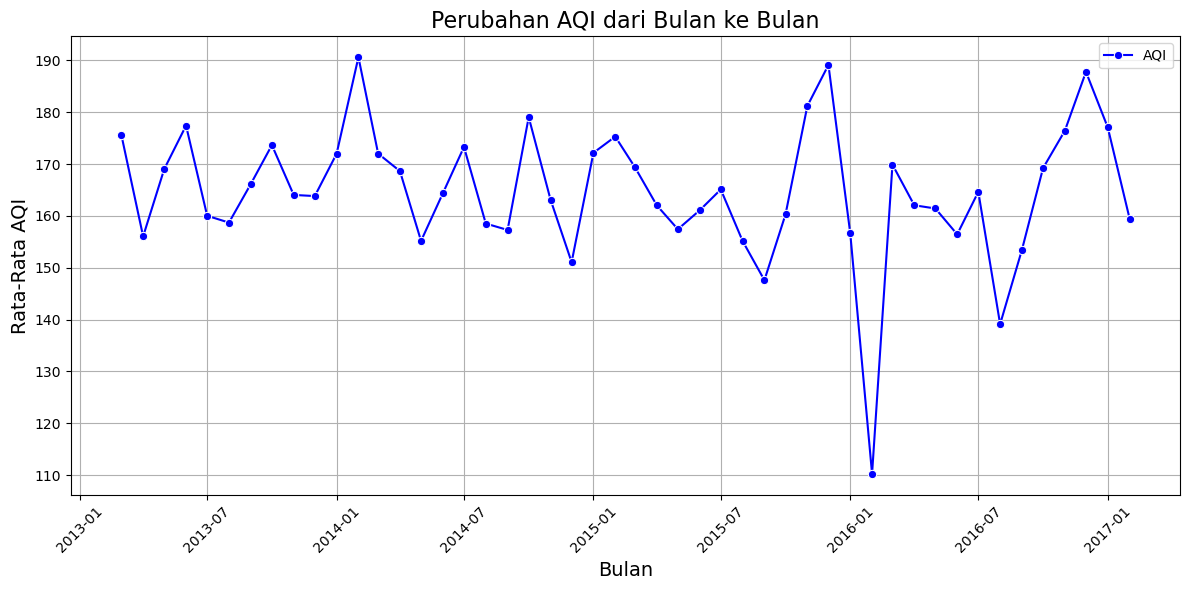

In [41]:
# Gabungkan kolom year dan month menjadi kolom datetime
df_monthly['datetime'] = pd.to_datetime(df_monthly['year'].astype(str) + '-' + df_monthly['month'].astype(str))

# Plot perubahan AQI dari bulan ke bulan
plt.figure(figsize=(12, 6))
sns.lineplot(x='datetime', y='AQI', data=df_monthly, color='b', marker='o', label='AQI')

# Tambahkan judul dan label
plt.title('Perubahan AQI dari Bulan ke Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Rata-Rata AQI', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


**Insight**
- Perkembangan kualitas udara dapat dianalisi dengan mevisualisasikan dataframe per bulan.
- Dilihat dari hasil visualisasi, tidak ada perkembangan selama dari 2013 hingga 2017. Dari garin tren, kualitas udara tidak menunjukkan kecendrungan untuk lebih baik ataupun lebih buruk

## Visualiasi Pengaruh Arah Datangnya Angin Terhadap Kualitas Udara

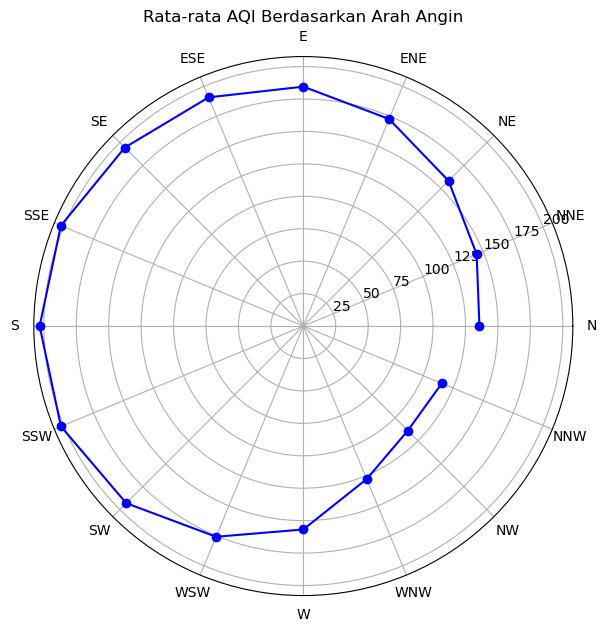

In [43]:
# Pastikan wd_degree digunakan sebagai index
wind_aqi = df_wind_aqi.sort_values(by="wd_degree")


# Ubah index ke array numerik sebelum konversi ke radian
theta = np.radians(wind_aqi["wd_degree"])  # Konversi ke radian
r = wind_aqi["AQI"].to_numpy()  # Konversi AQI ke array numerik

# Buat plot polar
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw={'projection': 'polar'})
ax.plot(theta, r, marker="o", linestyle="-", color="b")

# Atur label arah angin
wind_directions = {
    "N": 0, "NNE": 22.5, "NE": 45, "ENE": 67.5,
    "E": 90, "ESE": 112.5, "SE": 135, "SSE": 157.5,
    "S": 180, "SSW": 202.5, "SW": 225, "WSW": 247.5,
    "W": 270, "WNW": 292.5, "NW": 315, "NNW": 337.5
}

ax.set_xticks(np.radians(list(wind_directions.values())))
ax.set_xticklabels(list(wind_directions.keys()))

ax.set_title("Rata-rata AQI Berdasarkan Arah Angin")
plt.show()

**Insight**
- Hubungan arah datangnya angin dengan kualitas udara digambarkan dengan chart lingkaran arah mata angin.
- Kualitas udara dengan angin dari arah selatan cenderung lebih tinggi dibandingkan arah angin lainnya.
- Polutan dominan dari dataset ini adalah PM2.5 dan O3, PM2.5 datang dari arah barat daya. sedangakan O3 datang dari tenggara

# Akhir

In [58]:
df_cleaning.to_csv("Dongsi_PRSA_DF_Clean.csv", index=False)

In [45]:
tes_df = pd.read_csv("data/Dongsi_PRSA_DF_Clean.csv")
print(tes_df)

          No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  \
0          1  2013      3    1     0    9.0   9.0   3.0  17.0   300.0  89.0   
1          2  2013      3    1     1    4.0   4.0   3.0  16.0   300.0  88.0   
2          3  2013      3    1     2    7.0   7.0   4.0  17.0   300.0  60.0   
3          4  2013      3    1     3    3.0   3.0   5.0  18.0   250.0  72.0   
4          5  2013      3    1     4    3.0   3.0   7.0  21.5   200.0  84.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...     ...   ...   
35059  35060  2017      2   28    19   16.0  51.0   3.0  29.0   400.0  73.0   
35060  35061  2017      2   28    20   18.0  45.0   3.0  43.0   500.0  54.0   
35061  35062  2017      2   28    21   23.0  58.0   5.0  61.0   700.0  28.0   
35062  35063  2017      2   28    22   23.0  53.0   9.0  75.0   900.0  15.0   
35063  35064  2017      2   28    23   30.0  71.0  11.0  87.0  1200.0   4.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station 